In [33]:
import pandas as pd
from matplotlib import pyplot as plt

In [35]:
path = '/export/usuarios_ml4ds/mbalairon/github/recommendation_system_validation/outputs/'
recommendation = 'researchers'

In [36]:
df_2023 = pd.read_parquet(path + 'df_val_{}_2023.parquet'.format(recommendation))
df_2024 = pd.read_parquet(path + 'df_val_{}_2024.parquet'.format(recommendation))
df_202406 = pd.read_parquet(path + 'df_val_{}_20240620.parquet'.format(recommendation))

# Compare versions

In [50]:
methods = ['BERT', 'tfidf', 'bhattacharyya', 'embeddings']
agg_methods = ['sum', 'mean', 'mean_imp']

method = methods[1]
agg_method = agg_methods[2]

df_2023_filtrado = df_2023[df_2023['Método_Recomendación']=='{}_{}'.format(method, agg_method)]
df_2024_filtrado = df_2024[df_2024['Método_Recomendación']=='{}_{}'.format(method, agg_method)]
df_202406_filtrado = df_202406[df_202406['Método_Recomendación']=='{}_{}'.format(method, agg_method)]

In [51]:
df_2023_filtrado['id'] = df_2023_filtrado['Nombre'].str.cat(df_2023_filtrado['Topic'], sep='_')
df_2024_filtrado['id'] = df_2024_filtrado['Nombre'].str.cat(df_2024_filtrado['Topic'], sep='_')
df_202406_filtrado['id'] = df_202406_filtrado['Nombre'].str.cat(df_202406_filtrado['Topic'], sep='_')

df_2023_filtrado = df_2023_filtrado[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_2023', 'score_similitud':'score_similitud_2023', 'score_department':'score_department_2023', 'score':'score_2023'})
df_2024_filtrado = df_2024_filtrado[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_2024', 'score_similitud':'score_similitud_2024', 'score_department':'score_department_2024', 'score':'score_2024'})
df_202406_filtrado = df_202406_filtrado[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_202406', 'score_similitud':'score_similitud_202406', 'score_department':'score_department_202406', 'score':'score_202406'})


df_plot = pd.merge(df_2023_filtrado, df_2024_filtrado, on='id')
df_plot = pd.merge(df_plot, df_202406_filtrado, on='id')


/tmp/ipykernel_2170186/296137547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_filtrado['id'] = df_2023_filtrado['Nombre'].str.cat(df_2023_filtrado['Topic'], sep='_')
/tmp/ipykernel_2170186/296137547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_filtrado['id'] = df_2024_filtrado['Nombre'].str.cat(df_2024_filtrado['Topic'], sep='_')
/tmp/ipykernel_2170186/296137547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

2023 score mean: 0.37409747306396096
2024 score mean: 0.4275411376286667
2024 June score mean: 0.4473401696873945


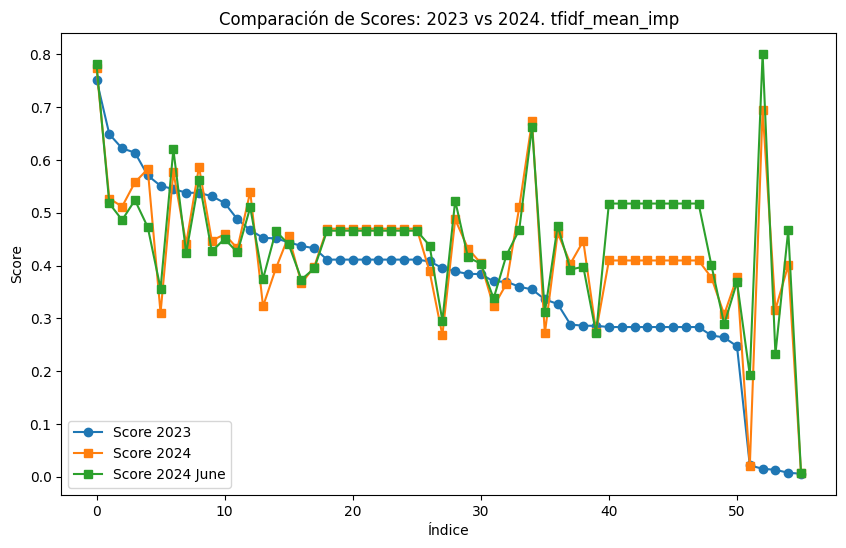

In [52]:
# Definir el tamaño del gráfico
print('2023 score mean:', df_plot['score_2023'].mean())
print('2024 score mean:', df_plot['score_2024'].mean())
print('2024 June score mean:', df_plot['score_202406'].mean())

plt.figure(figsize=(10, 6))

# Plotear los scores de 2023 y 2024
plt.plot(df_plot.index, df_plot['score_2023'], marker='o', label='Score 2023')
plt.plot(df_plot.index, df_plot['score_2024'], marker='s', label='Score 2024')
plt.plot(df_plot.index, df_plot['score_202406'], marker='s', label='Score 2024 June')

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Score')
plt.title('Comparación de Scores: 2023 vs 2024. {}_{}'.format(method, agg_method))

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

2023 score posicion mean: 0.7370793650793649
2024 score posicion mean: 0.8540284084293864
2024 June score posicion mean: 0.8593404354406798

2023 score similitud mean: 0.26230630812729067
2024 score similitud mean: 0.2971992510069609
2024 June score similitud mean: 0.326588355596518

2023 score department mean: 0.12290674598522733
2024 score department mean: 0.13139575344965268
2024 June score department mean: 0.15609171802498542



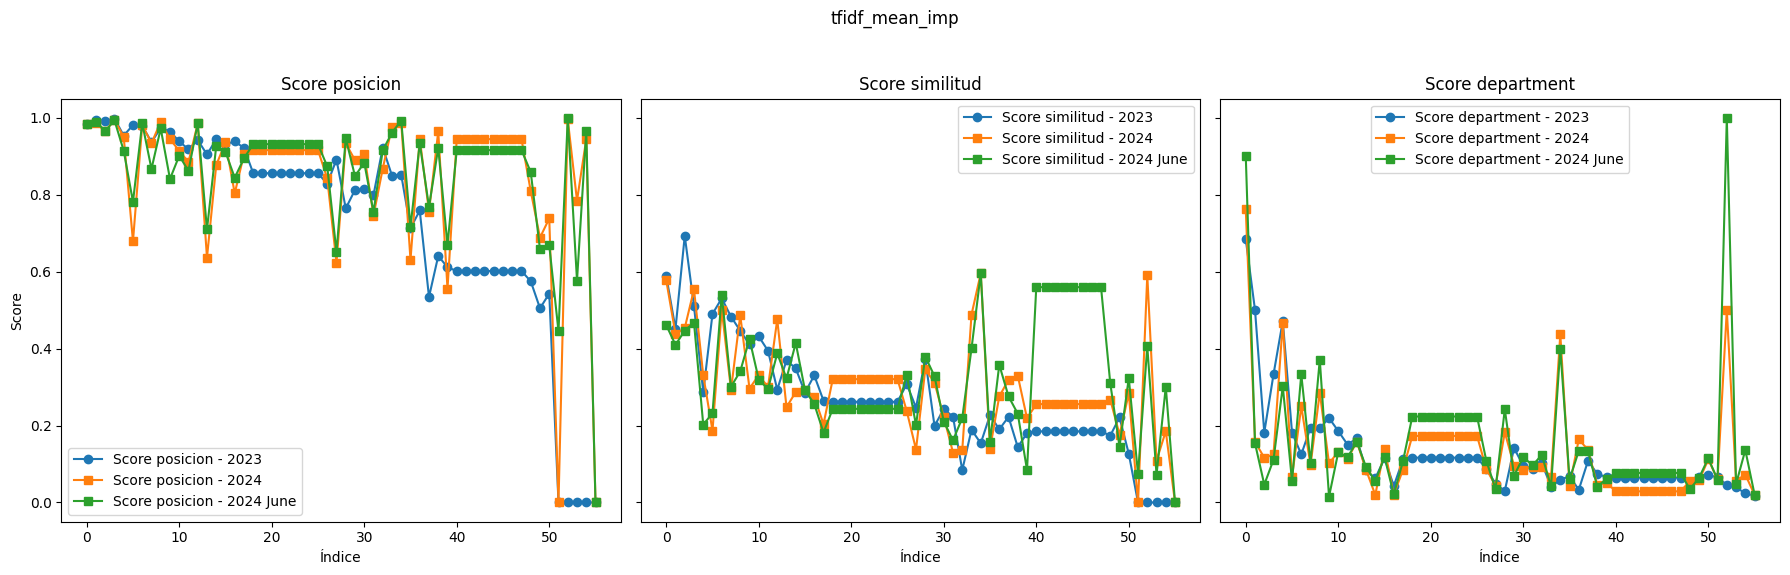

In [53]:
print('2023 score posicion mean:', df_plot['score_posicion_2023'].mean())
print('2024 score posicion mean:', df_plot['score_posicion_2024'].mean())
print('2024 June score posicion mean:', df_plot['score_posicion_202406'].mean())
print()
print('2023 score similitud mean:', df_plot['score_similitud_2023'].mean())
print('2024 score similitud mean:', df_plot['score_similitud_2024'].mean())
print('2024 June score similitud mean:', df_plot['score_similitud_202406'].mean())
print()
print('2023 score department mean:', df_plot['score_department_2023'].mean())
print('2024 score department mean:', df_plot['score_department_2024'].mean())
print('2024 June score department mean:', df_plot['score_department_202406'].mean())
print()

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Score Type 1
axs[0].plot(df_plot.index, df_plot['score_posicion_2023'], marker='o', label='Score posicion - 2023')
axs[0].plot(df_plot.index, df_plot['score_posicion_2024'], marker='s', label='Score posicion - 2024')
axs[0].plot(df_plot.index, df_plot['score_posicion_202406'], marker='s', label='Score posicion - 2024 June')
axs[0].set_title('Score posicion')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('Score')
axs[0].legend()

# Score Type 2
axs[1].plot(df_plot.index, df_plot['score_similitud_2023'], marker='o', label='Score similitud - 2023')
axs[1].plot(df_plot.index, df_plot['score_similitud_2024'], marker='s', label='Score similitud - 2024')
axs[1].plot(df_plot.index, df_plot['score_similitud_202406'], marker='s', label='Score similitud - 2024 June')
axs[1].set_title('Score similitud')
axs[1].set_xlabel('Índice')
axs[1].legend()

# Score Type 3
axs[2].plot(df_plot.index, df_plot['score_department_2023'], marker='o', label='Score department - 2023')
axs[2].plot(df_plot.index, df_plot['score_department_2024'], marker='s', label='Score department - 2024')
axs[2].plot(df_plot.index, df_plot['score_department_202406'], marker='s', label='Score department - 2024 June')
axs[2].set_title('Score department')
axs[2].set_xlabel('Índice')
axs[2].legend()

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.suptitle('{}_{}'.format(method, agg_method))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el rect para dar espacio al supertítulo

# Mostrar el gráfico
plt.show()

# Compare separated topic model VS Joint topic model

In [62]:
agg_methods = ['sum', 'mean', 'mean_imp']
agg_method = agg_methods[2]

df_2023_joint = df_2023[df_2023['Método_Recomendación']=='{}_{}'.format('bhattacharyya', agg_method)]
df_2024_joint = df_2024[df_2024['Método_Recomendación']=='{}_{}'.format('bhattacharyya', agg_method)]
df_202406_joint = df_202406[df_202406['Método_Recomendación']=='{}_{}'.format('bhattacharyya', agg_method)]
df_202406_separated = df_202406[df_202406['Método_Recomendación']=='{}_{}'.format('separated', agg_method)]

In [63]:
df_2023_joint['id'] = df_2023_joint['Nombre'].str.cat(df_2023_joint['Topic'], sep='_')
df_2024_joint['id'] = df_2024_joint['Nombre'].str.cat(df_2024_joint['Topic'], sep='_')
df_202406_joint['id'] = df_202406_joint['Nombre'].str.cat(df_202406_joint['Topic'], sep='_')
df_202406_separated['id'] = df_202406_separated['Nombre'].str.cat(df_202406_separated['Topic'], sep='_')

df_2023_joint = df_2023_joint[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_2023', 'score_similitud':'score_similitud_2023', 'score_department':'score_department_2023', 'score':'score_2023'})
df_2024_joint = df_2024_joint[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_2024', 'score_similitud':'score_similitud_2024', 'score_department':'score_department_2024', 'score':'score_2024'})
df_202406_joint = df_202406_joint[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_202406', 'score_similitud':'score_similitud_202406', 'score_department':'score_department_202406', 'score':'score_202406'})
df_202406_separated = df_202406_separated[['id', 'score_posicion', 'score_similitud', 'score_department', 'score']].rename(columns={'score_posicion':'score_posicion_202406_sep', 'score_similitud':'score_similitud_202406_sep', 'score_department':'score_department_202406_sep', 'score':'score_202406_sep'})


df_plot = pd.merge(df_2023_joint, df_2024_joint, on='id')
df_plot = pd.merge(df_plot, df_202406_joint, on='id')
df_plot = pd.merge(df_plot, df_202406_separated, on='id')

/tmp/ipykernel_2170186/2137130418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_joint['id'] = df_2023_joint['Nombre'].str.cat(df_2023_joint['Topic'], sep='_')
/tmp/ipykernel_2170186/2137130418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024_joint['id'] = df_2024_joint['Nombre'].str.cat(df_2024_joint['Topic'], sep='_')
/tmp/ipykernel_2170186/2137130418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

2023 score mean for joint topic models: 0.5012686179823975
2024 score mean for joint topic models: 0.43829167362642923
2024 June score mean for joint topic models: 0.47710195657790394
2024 June score mean for separated topic models: 0.4772089869451328


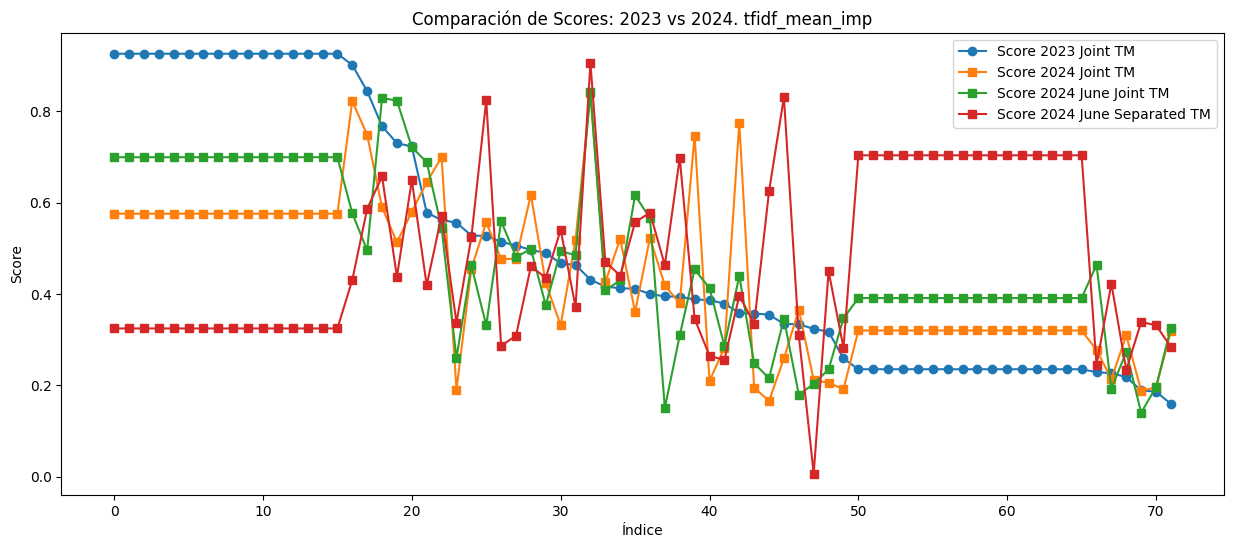

In [66]:
# Definir el tamaño del gráfico
print('2023 score mean for joint topic models:', df_plot['score_2023'].mean())
print('2024 score mean for joint topic models:', df_plot['score_2024'].mean())
print('2024 June score mean for joint topic models:', df_plot['score_202406'].mean())
print('2024 June score mean for separated topic models:', df_plot['score_202406_sep'].mean())

plt.figure(figsize=(15, 6))

# Plotear los scores de 2023 y 2024
plt.plot(df_plot.index, df_plot['score_2023'], marker='o', label='Score 2023 Joint TM')
plt.plot(df_plot.index, df_plot['score_2024'], marker='s', label='Score 2024 Joint TM')
plt.plot(df_plot.index, df_plot['score_202406'], marker='s', label='Score 2024 June Joint TM')
plt.plot(df_plot.index, df_plot['score_202406_sep'], marker='s', label='Score 2024 June Separated TM')

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Score')
plt.title('Comparación de Scores: 2023 vs 2024. {}_{}'.format(method, agg_method))

# Añadir una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

2023 score posicion mean Joint TM: 0.757641975308642
2024 score posicion mean Joint TM: 0.7645906909354342
2024 June score posicion mean Joint TM: 0.7860975278456941
2024 June score posicion mean Separated TM: 0.7122536774909798

2023 score similitud mean Joint TM: 0.44220842094647717
2024 score similitud mean Joint TM: 0.4071366420288621
2024 June score similitud mean Joint TM: 0.48781938682423587
2024 June score similitud mean Separated TM: 0.5635530681911912

2023 score department mean Joint TM: 0.3039554576920735
2024 score department mean Joint TM: 0.14314768791499163
2024 June score department mean Joint TM: 0.15738895506378178
2024 June score department mean Separated TM: 0.15582021515322733



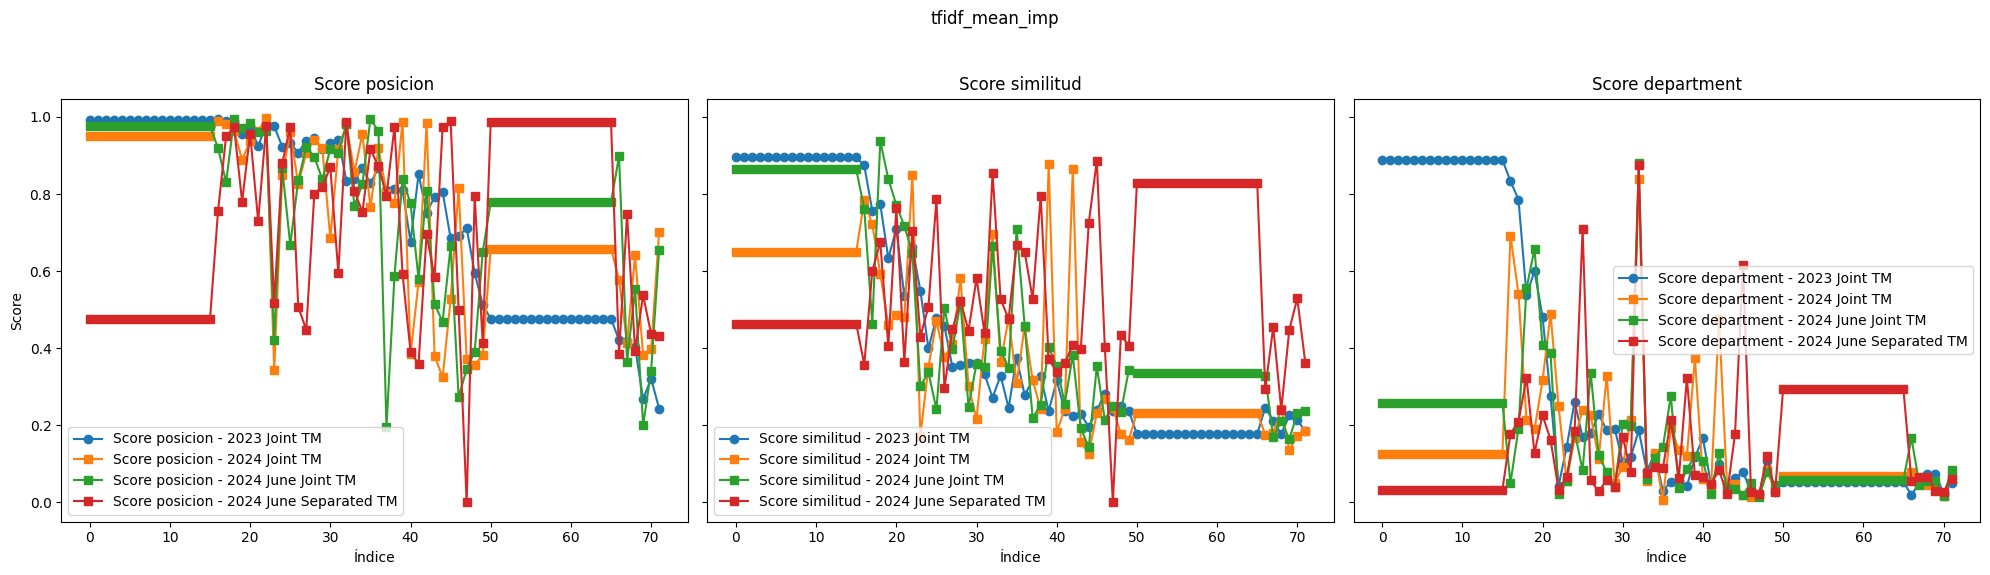

In [67]:
print('2023 score posicion mean Joint TM:', df_plot['score_posicion_2023'].mean())
print('2024 score posicion mean Joint TM:', df_plot['score_posicion_2024'].mean())
print('2024 June score posicion mean Joint TM:', df_plot['score_posicion_202406'].mean())
print('2024 June score posicion mean Separated TM:', df_plot['score_posicion_202406_sep'].mean())
print()
print('2023 score similitud mean Joint TM:', df_plot['score_similitud_2023'].mean())
print('2024 score similitud mean Joint TM:', df_plot['score_similitud_2024'].mean())
print('2024 June score similitud mean Joint TM:', df_plot['score_similitud_202406'].mean())
print('2024 June score similitud mean Separated TM:', df_plot['score_similitud_202406_sep'].mean())
print()
print('2023 score department mean Joint TM:', df_plot['score_department_2023'].mean())
print('2024 score department mean Joint TM:', df_plot['score_department_2024'].mean())
print('2024 June score department mean Joint TM:', df_plot['score_department_202406'].mean())
print('2024 June score department mean Separated TM:', df_plot['score_department_202406_sep'].mean())
print()

fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Score Type 1
axs[0].plot(df_plot.index, df_plot['score_posicion_2023'], marker='o', label='Score posicion - 2023 Joint TM')
axs[0].plot(df_plot.index, df_plot['score_posicion_2024'], marker='s', label='Score posicion - 2024 Joint TM')
axs[0].plot(df_plot.index, df_plot['score_posicion_202406'], marker='s', label='Score posicion - 2024 June Joint TM')
axs[0].plot(df_plot.index, df_plot['score_posicion_202406_sep'], marker='s', label='Score posicion - 2024 June Separated TM')
axs[0].set_title('Score posicion')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('Score')
axs[0].legend()

# Score Type 2
axs[1].plot(df_plot.index, df_plot['score_similitud_2023'], marker='o', label='Score similitud - 2023 Joint TM')
axs[1].plot(df_plot.index, df_plot['score_similitud_2024'], marker='s', label='Score similitud - 2024 Joint TM')
axs[1].plot(df_plot.index, df_plot['score_similitud_202406'], marker='s', label='Score similitud - 2024 June Joint TM')
axs[1].plot(df_plot.index, df_plot['score_similitud_202406_sep'], marker='s', label='Score similitud - 2024 June Separated TM')
axs[1].set_title('Score similitud')
axs[1].set_xlabel('Índice')
axs[1].legend()

# Score Type 3
axs[2].plot(df_plot.index, df_plot['score_department_2023'], marker='o', label='Score department - 2023 Joint TM')
axs[2].plot(df_plot.index, df_plot['score_department_2024'], marker='s', label='Score department - 2024 Joint TM')
axs[2].plot(df_plot.index, df_plot['score_department_202406'], marker='s', label='Score department - 2024 June Joint TM')
axs[2].plot(df_plot.index, df_plot['score_department_202406_sep'], marker='s', label='Score department - 2024 June Separated TM')
axs[2].set_title('Score department')
axs[2].set_xlabel('Índice')
axs[2].legend()

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.suptitle('{}_{}'.format(method, agg_method))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el rect para dar espacio al supertítulo

# Mostrar el gráfico
plt.show()